In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# lets create some synthetic data 
from sklearn.datasets import make_regression
x,y = make_regression(n_samples=1000,n_features=2,n_targets=1,noise = 3.0)

In [4]:
x

array([[ 0.92812021, -0.95566743],
       [ 0.20707407, -1.07793324],
       [-0.3496663 ,  0.65427605],
       ...,
       [-0.50353379, -1.48796928],
       [-0.09614108, -0.91351386],
       [-2.47750787,  0.85460718]])

In [5]:
y

array([ 3.14058845e+01, -2.28602323e+01, -9.12008320e-01, -1.54462747e+01,
       -2.40087814e+01, -3.79782623e+01,  2.96913497e+00, -6.94867516e+01,
        2.29844545e+01,  4.91117116e+01, -4.17619550e+01,  3.87637525e+01,
        4.00393410e+01,  2.56458973e+01,  1.20804509e+01, -2.20006720e+02,
        3.38789528e+01, -1.62942849e+02,  1.07399152e+02, -2.38326059e+02,
       -3.42386429e+01,  1.70107119e+01,  1.00639109e+02,  1.03001751e+02,
        6.19558358e+01,  4.26894215e+01, -2.38074172e-01,  7.66463533e+01,
       -1.28133515e+02,  6.55331896e+01, -1.17562970e+02, -1.15349533e+01,
       -1.26163502e+02, -6.98258926e+01,  3.15178485e+01,  2.46358088e+01,
        1.35647816e+02, -1.03433685e+01, -1.03440346e+02, -1.22906600e+02,
       -3.66195468e+01,  6.88763342e+01,  3.61573556e+01, -3.24485631e+01,
        5.47553937e+01, -3.02418235e+01,  1.90903802e+02,  2.42540237e+01,
       -7.12368189e+01,  8.23469213e+01, -1.68694231e+01, -1.03161152e+02,
        9.28061658e+01, -

<Axes: xlabel='0', ylabel='1'>

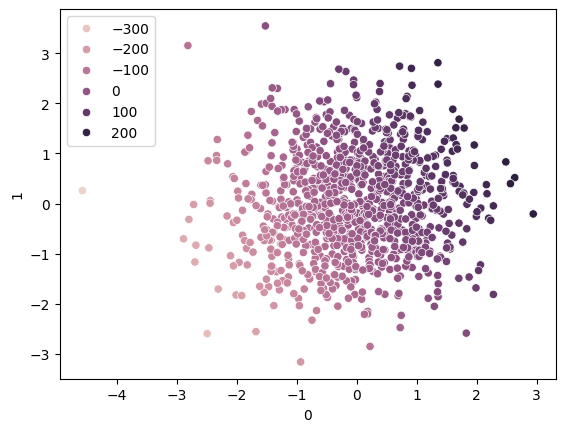

In [7]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')

In [10]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [11]:
svr.coef_

array([[73.32385779, 37.77163024]])

In [12]:
# predication
y_pred = svr.predict(x_test)

In [13]:
y_pred

array([ 205.54222651,   31.67874885,   98.52386816,  -43.18533522,
         92.39474926,   51.01628074,   15.24837127, -126.0793039 ,
         43.50590958,  -58.45112214,   -5.48394079,   30.74489066,
        -85.23106774, -233.87188854,   -6.60128128,  -31.93609701,
        -85.87585968,  -55.59995524,  -52.65259314,   43.20405399,
        -89.91553099,   12.46043506,  135.3022915 ,   75.55809127,
         41.85344143,   36.23790612,   -3.68810958,  136.11674068,
        112.40847488,   -9.50345011,  -58.64796571,  -33.78369292,
        108.11669843,  -45.85546265,   44.91349266,   53.68329581,
         27.02338761,  -81.62250751, -110.91812233,  -40.99336979,
         29.85725093,  121.30560125,  -80.30007384,  -34.84247287,
         60.0630971 ,  156.07102371,   -4.29021287,  -19.19526815,
         31.44585496,  101.04539962,   74.09356777,   61.42479491,
         22.65069046,   37.86605873,  108.35697385, -123.40858167,
        212.80747723,   26.31008532,  -53.73696947,  102.68394

In [14]:
from sklearn.metrics import r2_score

In [15]:
print(r2_score(y_test,y_pred))

0.9985628373609641


#  **Hyper parameter tuning with SVR**

In [16]:
from sklearn.model_selection import GridSearchCV

# defining param grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['linear'],
    'epsilon': [0.1,0.2,0.3]
}

In [17]:
grid= GridSearchCV(SVR(),param_grid=param_grid,refit=True,verbose=3)

In [18]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.305 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.335 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.301 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.325 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.312 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.305 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.335 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.301 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.325 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.312 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [19]:
grid.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [20]:
## prediction
y_pred4 = grid.predict(x_test)
print(r2_score(y_test,y_pred))

0.9985628373609641
